# Predicting Product Returns Using K-Nearest Neighbors (KNN)

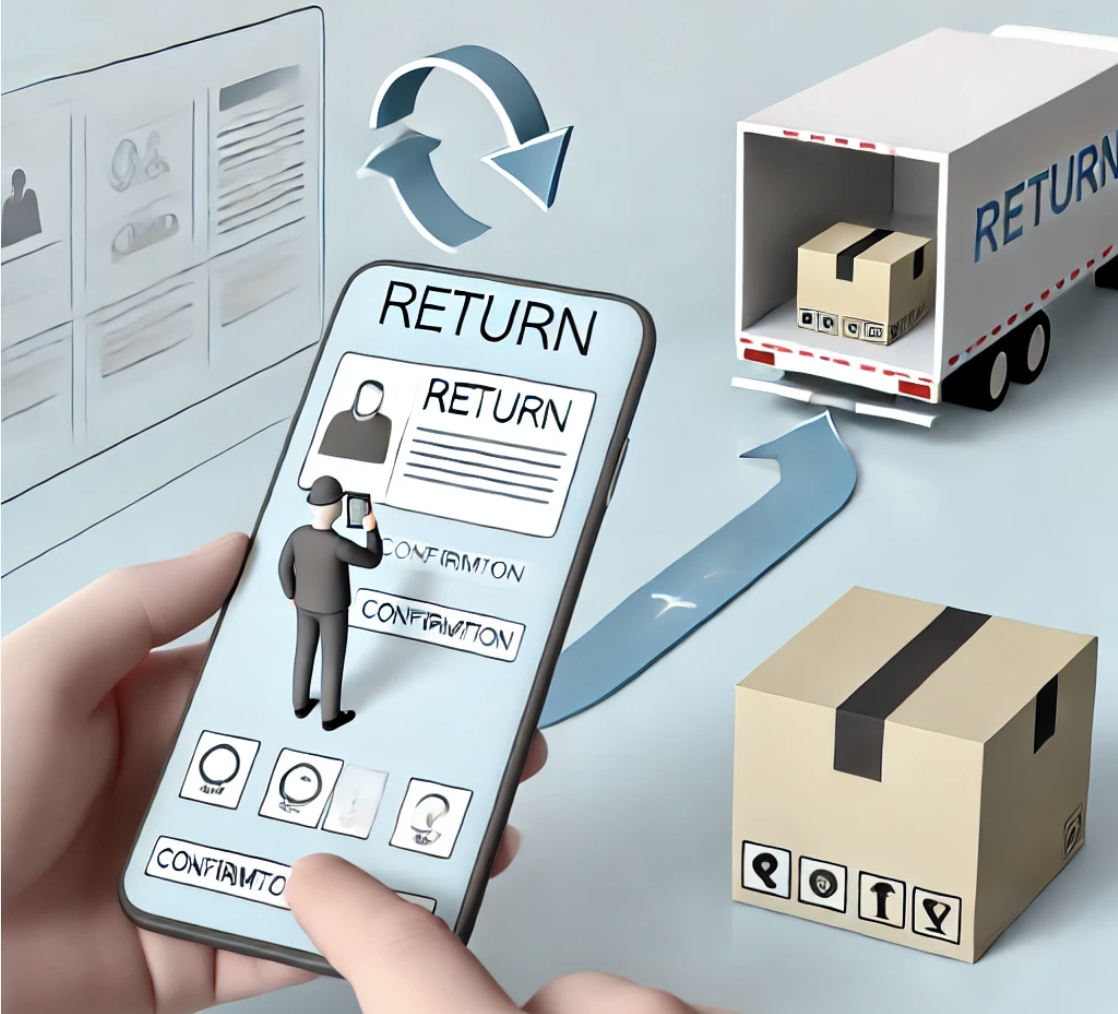</img>

### Why predicting returns?

* Insights into product quality issues, customer preferences,  areas for improvement in the supply chain or product offerings, etc.

* More efficient inventory management by taking returned products into account.

* Better planning of transportation capacities
* ...

## Data exploration and preprocessing

Let's load a dataset of transaction records.

Target variable $y$: **returned** 
* 1 means that the product is returned (positive), 0 means not returned (negative)

Features ($X$):
* **Transaction_ID**: Identifier of the order to which the product belong
* **Customer_ID** Unique identifier of the customer who made the purchase
* **Product_Category**: The category of the product
* **Location**: Location of the customer
* **Order_Size**: Number of items included in the order
* **Price**: Price of the product 
* **Coupon**: Is a coupon used for the product?
* **Return_Last_Year**: How many returns were made by the same customer in the past year
* **Total_Purchase_Last_Year**: Total dollar amount of the same customer's spending in the past year


**Data cleaning**: As usual, one needs to check missing values, replications, outliers, etc. (Skipped here.)

**Data exploration**: Let's check the distribution of the target variable (and other variables)

The class labels are balanced. So we will not perform over-/under-sampling.

Let's perform **one-hot encoding** for
* Product_Category
* Location
* Coupon

We will:
* seperate the target variable and the feature variables
* split the dataset into a training set and a testing set.

**Feature scaling** for KNN is important, because KNN uses distance metrics like Euclidean distance to find the nearest neighbors, wbich is sensitive to scale.


For example,
* The variable **Order_Size** ranges from <a style="color: blue;">1 to 6</a>
* The variable **Price** ranges from <a style="color: red;">17 to 88</a>

The latter has a much larger scale, thus contributing more to the calcualtion of distances. As a result, it could have an (unfairly) larger influence on the result.

So we will scale the features. 

The output `X_scaled` from the StandardSacler is a numpy array. For consistancy with `y`, we may convert `X_scaled` to a DataFrame.

Let's check again the scales of **Order_Size** and **Price**

We can now do the train test split.

### Building and training a KNN model

To build a KNN model, we can use the `KNeighborsClassifier()` function in `sklearn`. 

Note that we need to specify the **number of nearest neighbors** to use for prediction using the `n_neighbors=` argument.

### Model performance

We will predict on the test dataset and compare the predictions with the observations.

* Import the performance metrics.
* Predict on the test data.
* Get the performance measures.

### Cross validation

Cross-validation is a technique used to assess the performance and generalizability of a model by dividing the dataset into multiple subsets.

Process of the k-fold cross validation:
* The data is split into $k$ equal parts (called **folds**) for $k$-fold cross-validation.
* The model is trained on $k-1$ folds and tested on the remaining fold. 
* This process is repeated $k$ times, each time using a different fold as the test set.

**Result**: The performance metrics (e.g., accuracy, precision, AUC) from each fold are averaged to provide a more reliable estimate of the model's performance.

Example: 5-fold cross validation.
* First, divide the dataset into 5 equal folds
* Each fold gets a turn to act as the testing dataset; see the following illustrations

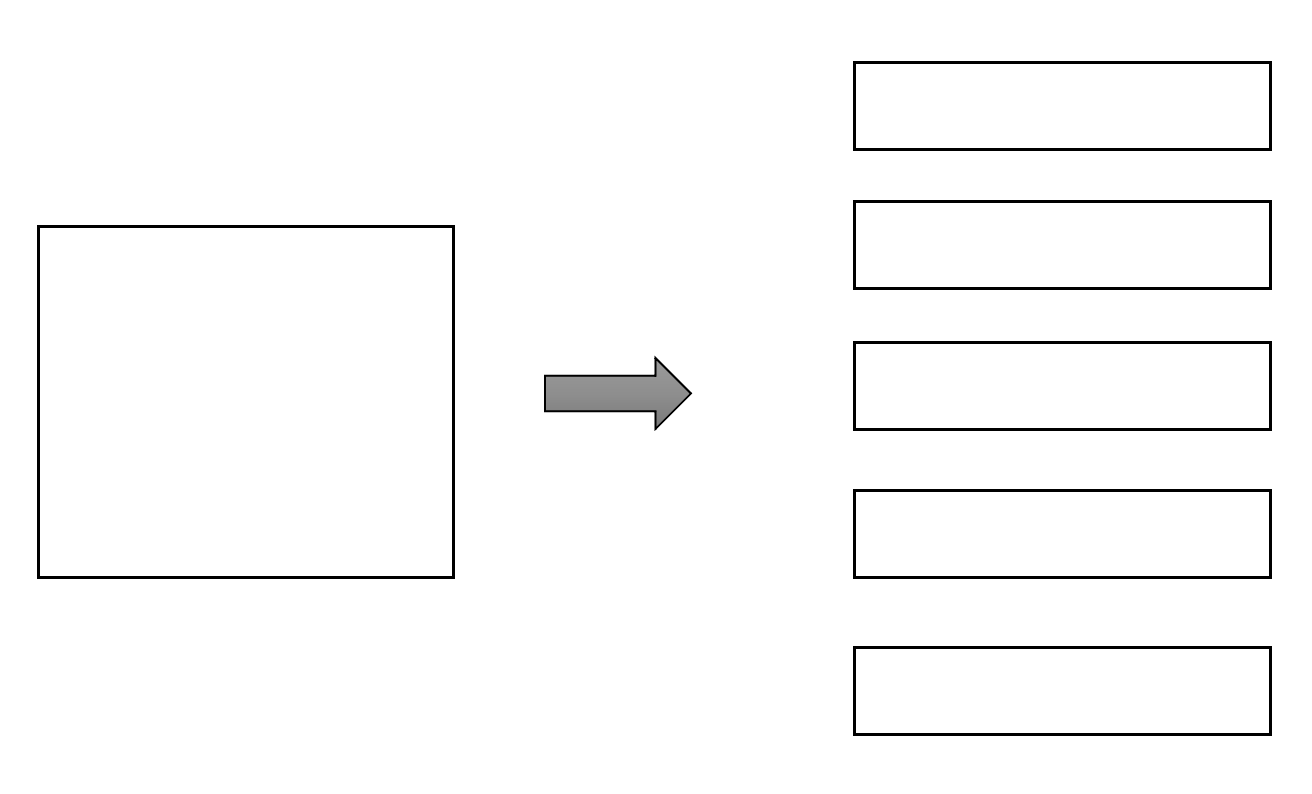</img>

#### First train-test split
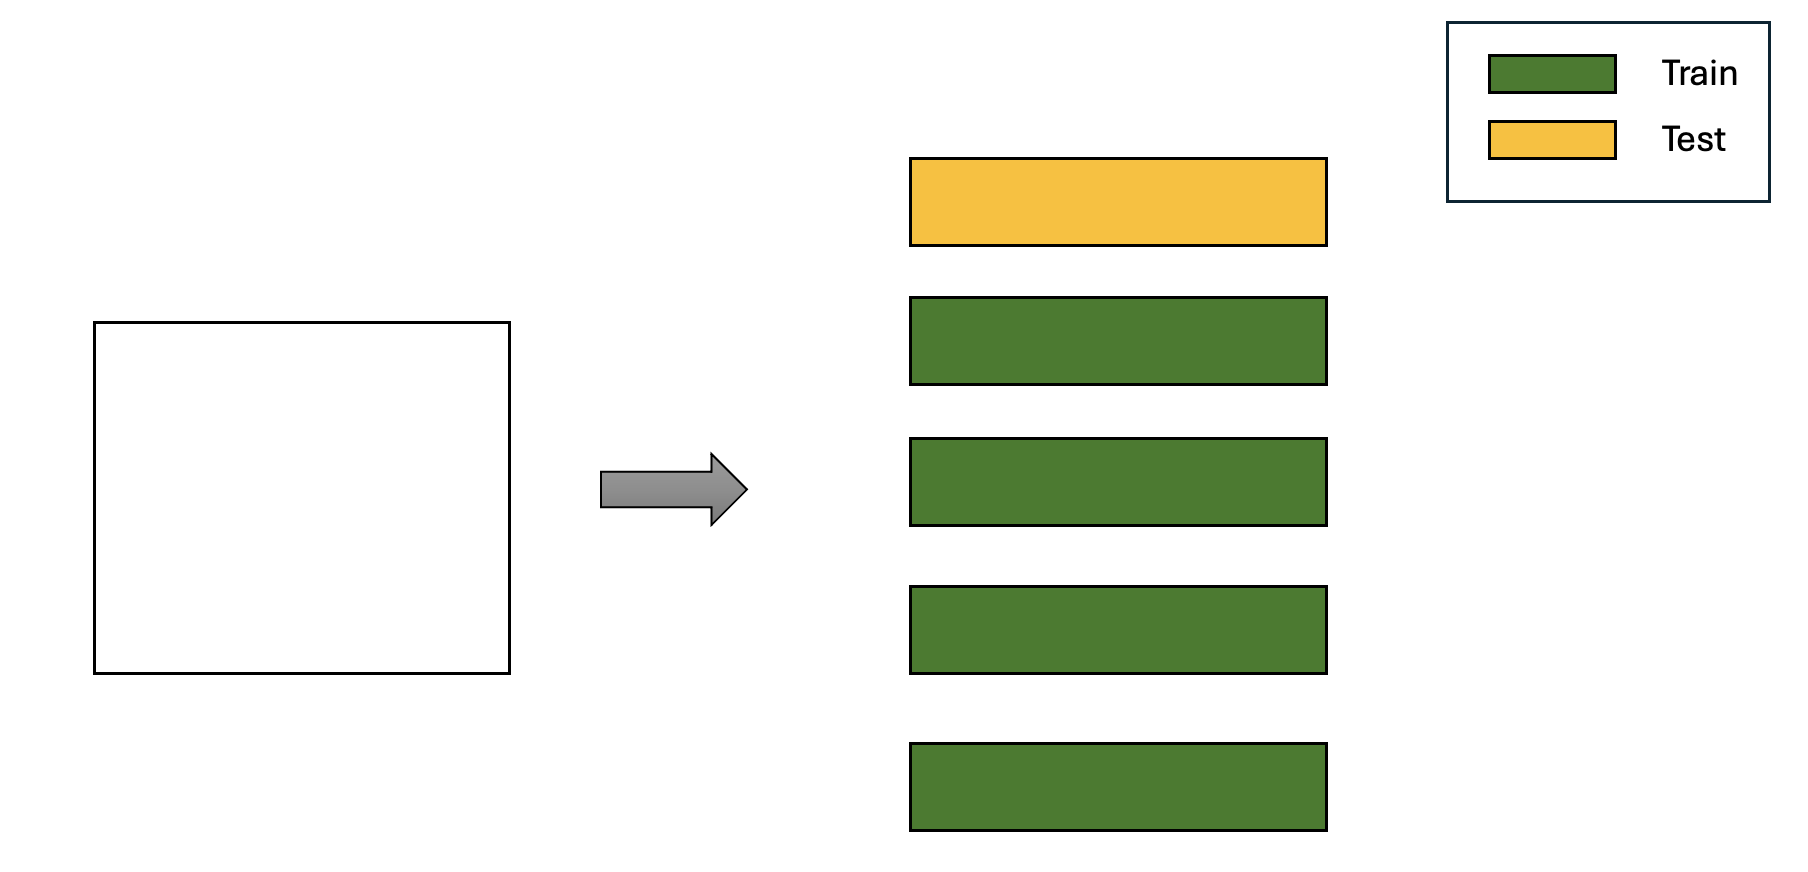 </img>

#### Second train-test split

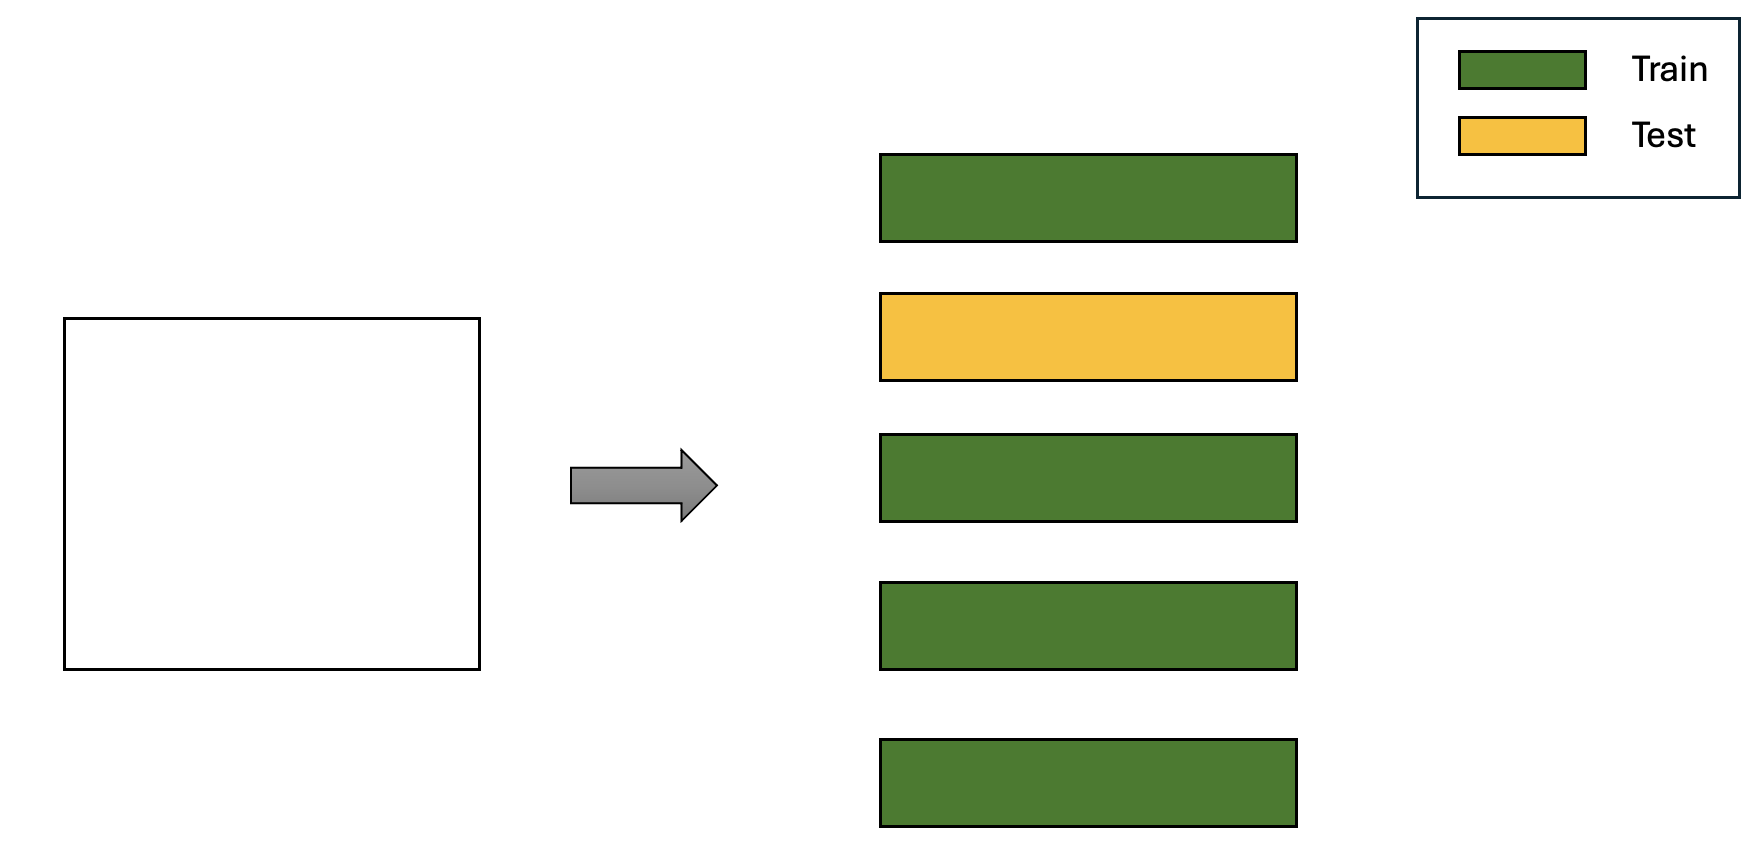</img>

#### Third train-test split

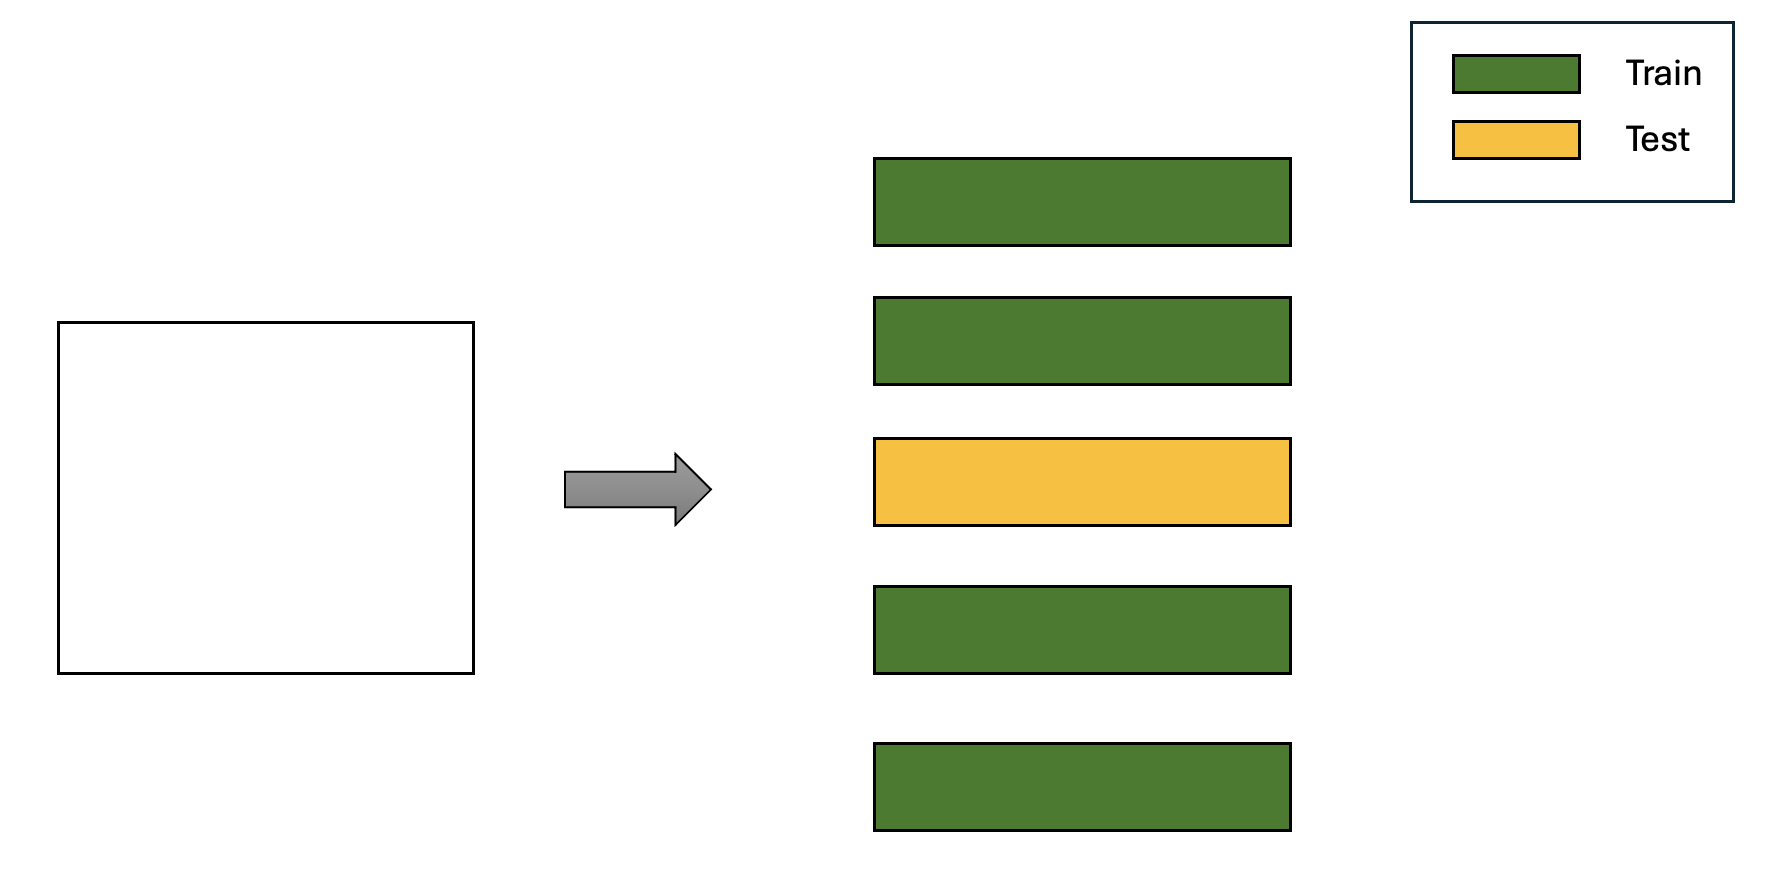</img>

#### Fourth train-test split

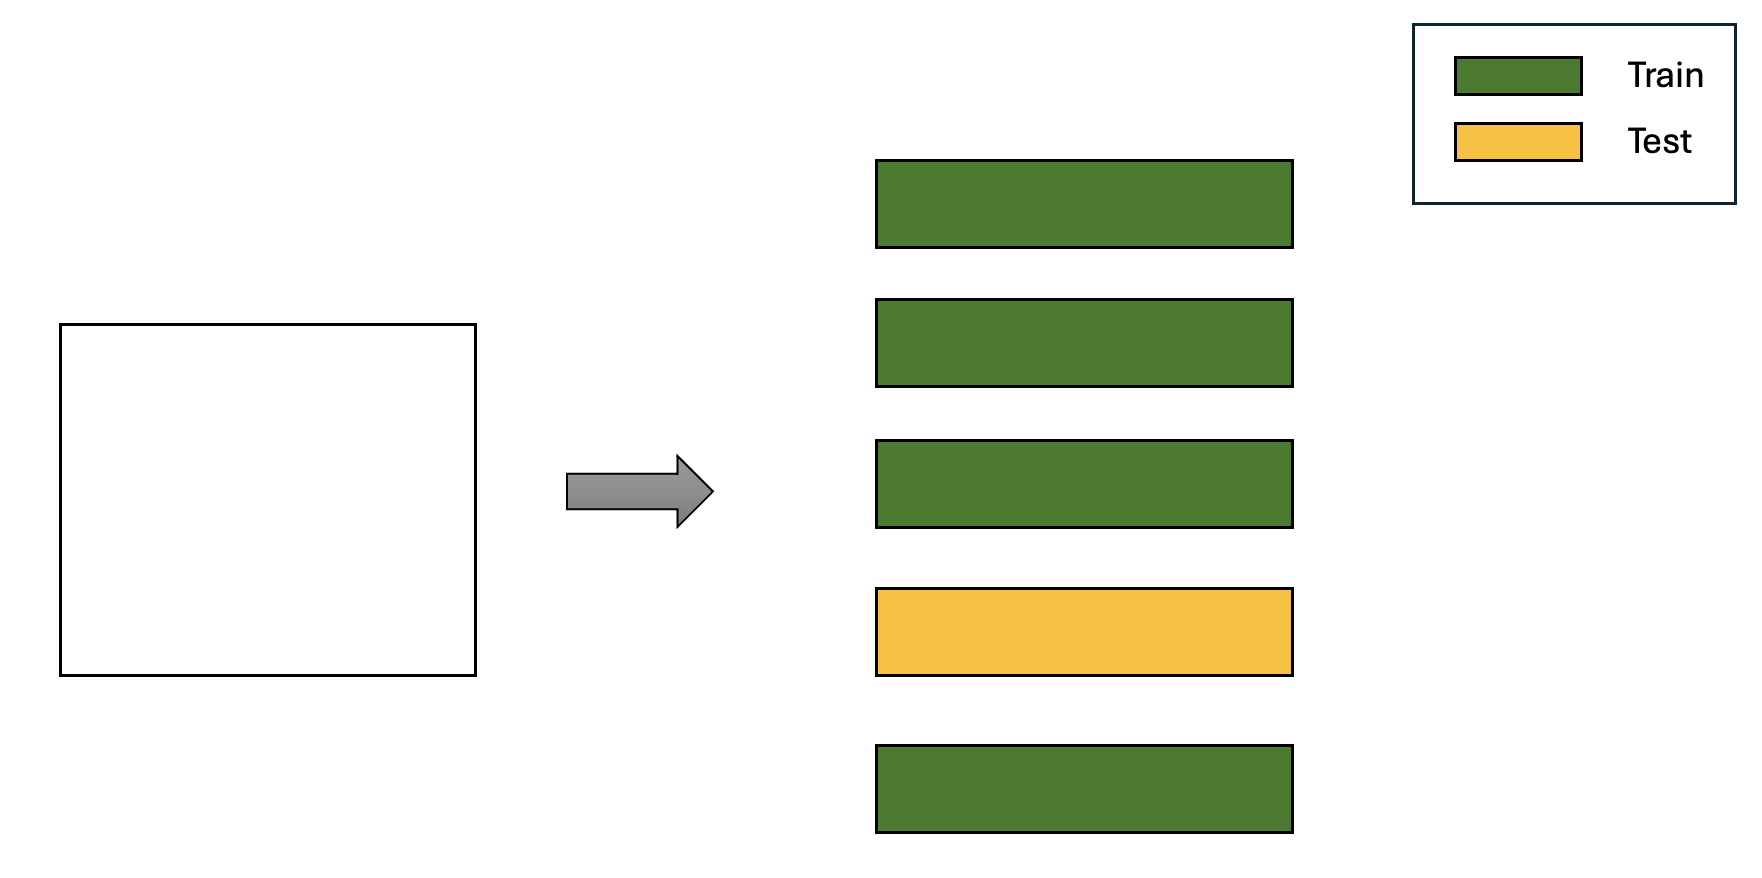</img> 

#### Fifth train-test split

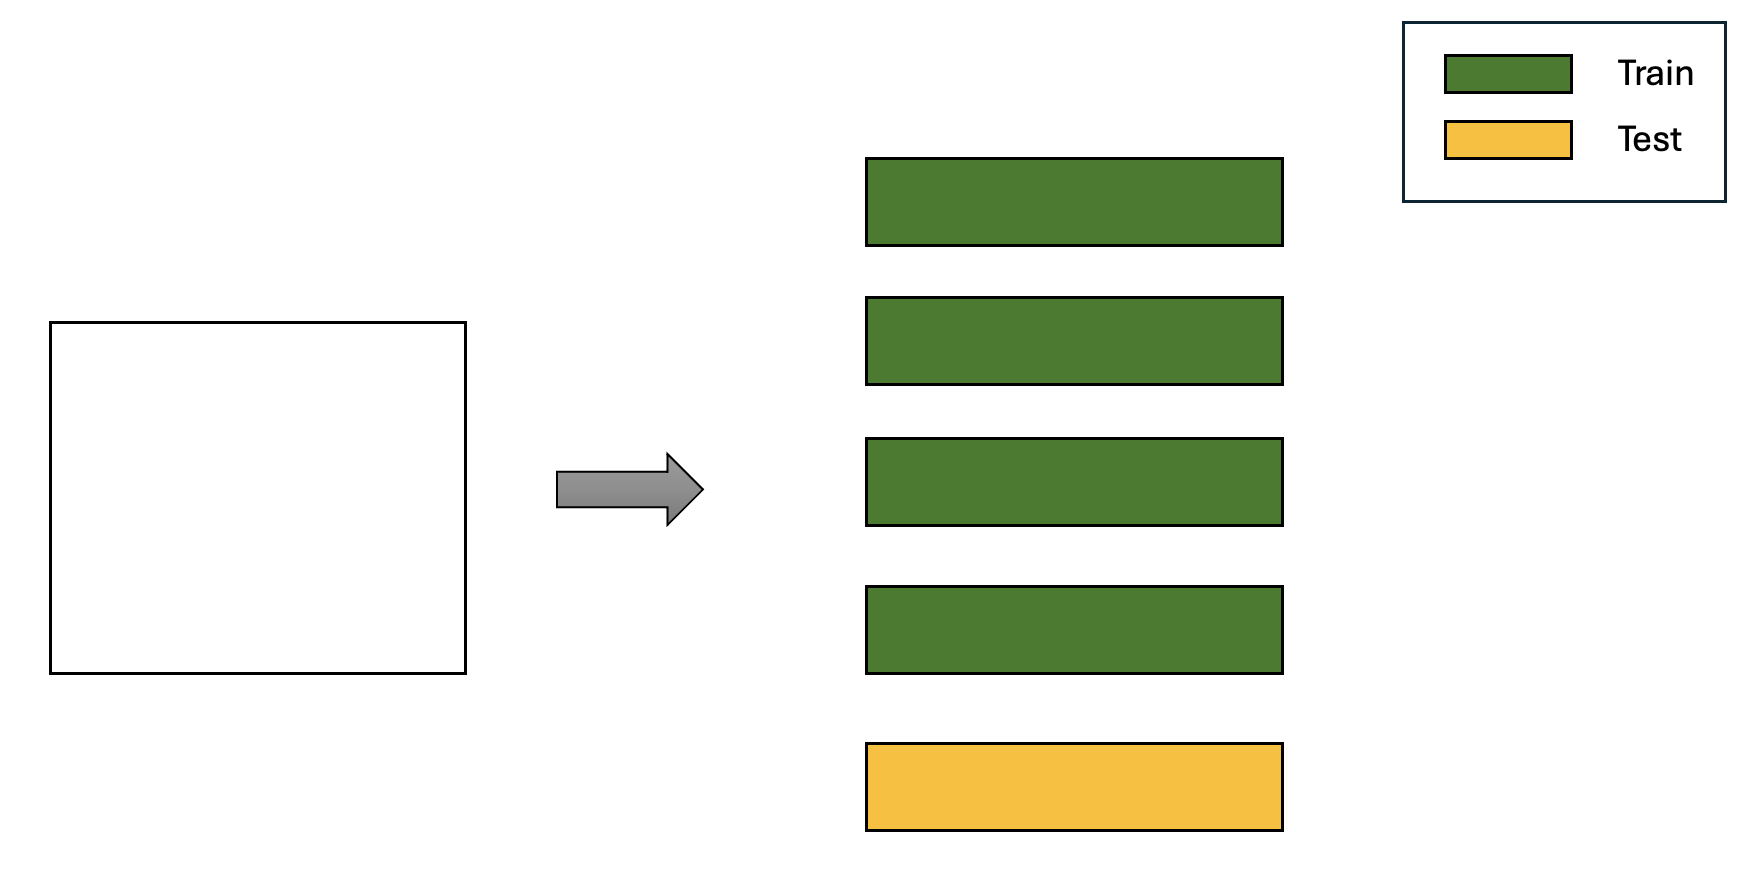</img>

Why cross validation?
* Ensures that the model's performance is **evaluated on multiple test sets**, giving a better indication of how it will perform on unseen data.
* **Makes the most** of a limited dataset by using all data points for both training and testing across different iterations.

To implement cross validation, we first need to define a **cross-validation strategy**.

The `StratifiedKFold()` function from the module `model_selection` in `sklearn` defines a cross-validation strategy.
* 'Stratified' means that the fraction of a class label in each fold are the same. 
* It use the following arguments:
    * `n_splits=` specifies the number of folds
    * `shuffle=True` will shuffle the rows before splitting, effectively randomize the split
    * `random_state=` specifies the random state/see for shuffling, ensuring reproducibility

The function `cross_val_score()` calculates the performance score (accuracy, precision, auc score, etc.) for all the train-test splits in a cross validation procedure.
* We need to provide the following argments:
    * The learning model (linear regression, logistic regression, KNN, etc.)
    * features (X) and target (y); the function `cross_val_score()` will do the train-test split on them
    * `cv=` specifies the cross-validation strategy
    * `scoring=` specifies the performance scores to use.

The **mean score** often serve as the main performance measure for selecting models and hyperparameter tuning.

For classifications, we can use the following scores:
* 'accuracy': Proportion of correctly classified samples.
* 'precision': Precision score (use 'precision_macro', 'precision_weighted', etc. for different averaging methods)
* 'recall': Recall score (use 'recall_macro', 'recall_weighted', etc. )
* 'f1': F1 score (use 'f1_macro', 'f1_weighted', etc.)
* 'roc_auc': Area under the Receiver Operating Characteristic curve (useful for binary classification problems)

### Choosing the number of neighbors based on cross-validation

The number of neighbors to use in KNN, `n_neighbors`, is a **hyperparameter**, as it is not chosen during the training/fitting process. 

`GridSearchCV` in `scikit-learn.model_selection` is a powerful tool used to perform hyperparameter tuning for machine learning models.

`GridSearchCV` work as follows:

1. **Define a Range of Hyperparameters**: We specify a dictionary where the keys are the hyperparameters you want to tune, and the values are the lists of values to try.

2. It **trains and evaluates the model** for *every combination of hyperparameters* using **cross-validation**, with respect to a given performance score.

In [1]:
# Import the GridSearchCV function

# Define the parameter grid. We will only tune 'n_neighbors' here.

# Define the learning model. We use KNN here

# Define the grid search with cross-validation. Note that 'stratified_kfold' is defined earlier.
# By default, scoring='accuracy' is used; but we may change it.

# Fit the grid_search. We need to provide the features (X) and the target (y) before splitting




In the above, we searched for the best value of `n_neighbors` over the range $1,5,9,13,...,101$.

During the fitting process, the model calculates and compares the **average score under cross-validation** for each value in the range. 


After fitting, the attritues `.best_params_` and `.best_score_` of the `GridSearchCV` object will give us the best parameter value for maximizing the score, and the corresponding best score.

The `.best_estimator_` attriute of the grid search rerturns the KNN model with the best number of neighbors number.

An important **note**:

* When fitting the `GridSearchCV`, we used `grid_search.fit(X_train, y_train)`. This means:
    * We split `X_train` and `y_train` into five folds, each fold gets a turn to be used for evaluating the model score.

* `GridSearchCV` does not see the test dataset `X_test` and `y_test`
    * So they can still be used for simulating the future.


Let's now predict on `X_test`. In the following, we generate the classification report. One should also calculate the AUC score.

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       491
           1       0.79      0.71      0.75       487

    accuracy                           0.77       978
   macro avg       0.77      0.77      0.77       978
weighted avg       0.77      0.77      0.77       978



### Predicting for a new data point

Let's predict for the following new data point.

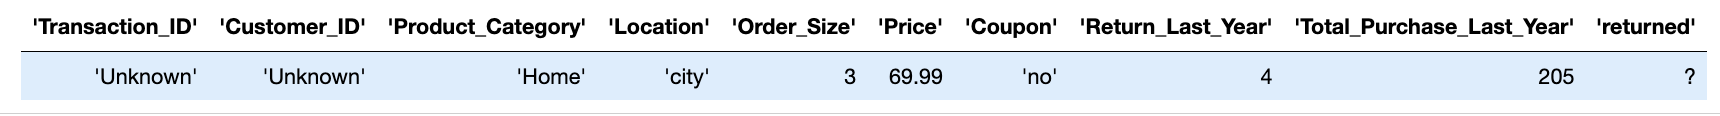


We will need to **encode** and **scale** the data point!

How do we encode the new data point?

We can append the new data point to `df_returns`.

Note that:
* the argument `axis=0` in `pd.concat()` will combine the two DataFrame vertically (along axis 0), effectively appending the new data point to the end of the original dataset `df_returns`, and
* `ignore_index=True` will reset the indexes after combining the two DataFrames 

Now let's encode the combined dataset.

We still need to scale the new datapoint in the *same way* as the original feature data `X` was scaled. 

So the model predicts that the purchase will be returned.